In [2]:
#Import Modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as DT
from datetime import datetime

HOME = os.path.expanduser("~")+'/'

import matplotlib.pyplot as p
import matplotlib.ticker as mticker
import seaborn as sns


           Date      Jghg        R2      Error  Nb_pts  Nb_hrs Rise_stop  \
88   2021-01-30  0.793495  0.738665  15.441791       9     8.0     0.000   
89   2021-01-30  0.065668  0.738665  15.441791       9     8.0     0.000   
90   2021-01-30  0.108673  0.738665  15.441791       9     8.0     0.000   
91   2021-01-30  0.100855  0.738665  15.441791       9     8.0     0.000   
100  2021-02-02 -0.054229  0.748051 -18.304209       9     8.0     0.692   
...         ...       ...       ...        ...     ...     ...       ...   
1179 2021-12-20  0.041508  0.789817  15.551987       9     8.0     0.000   
1196 2021-12-25  0.057707  0.708098  18.474624       9     8.0     2.883   
1197 2021-12-25  0.014389  0.708098  18.474624       9     8.0     2.883   
1198 2021-12-25  0.017434  0.708098  18.474624       9     8.0     2.883   
1199 2021-12-25  0.027901  0.708098  18.474624       9     8.0     2.883   

      Rn_amplitude     JRn          Type  
88           1.571  52.000     UserValue  
8

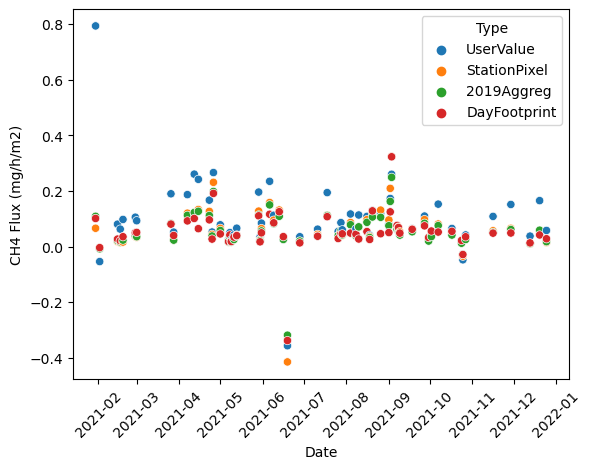

In [3]:
half_day= DT.timedelta(days=0.5)
######Write here the names of the files you want to plot the data from
files=['RTMFlux_CH4_SAC100_traceRadon_rnflux_ERA5-Land_day_2021_v0.6.nc_2021-01-01_2021-12-31']#,'RTMFlux_CH4_2019-02-01_2019-03-01','RTMFlux_CH4_2019-08-01_2019-09-01']
#####Write the name of the site(s) you are interested in
site=["SAC"]#,"WAO"]
for filename in files:
    #####Read the selected file and plot the flux vs time
    Flux = pd.read_table("outputData/"+filename, header=None, names=['Date',"Jghg","R2","Error","Nb_pts","Nb_hrs","Rise_stop","Rn_amplitude","JRn","Type"] )
    Flux.replace(0, np.nan, inplace=True)  
    Flux['Date'] =pd.to_datetime(Flux.Date)
    ###### add criteria to sort data eg.: R2>0.6, error<50%, Rnrise>1
    Flux=Flux[(Flux.R2>0.6) & (Flux.Error<50) & (Flux['Rn_amplitude']>1) & (Flux['Nb_hrs']>=2)]
    #######get the species name for the axis
    species=(filename)[8:11]
    
    print(Flux)
    ###here chose JRn of Jghg
    g = sns.scatterplot(data=Flux,x='Date',y='Jghg', hue="Type")
    #g = sns.scatterplot(data=Flux,x='Date',y='JRn', hue="Type")
    
    ####choose the Rn or GHG axis label
    plt.ylabel(str.upper(species)+" Flux (mg/h/m2)")
    #plt.ylabel("Rn Flux (Bq/h/m2)")
    plt.xticks(rotation=45)  
    fig = g.get_figure()

    
    #name for the saved file
    fig.savefig("outputData/"+filename+'_ghg.png')
    #fig.savefig("outputData/"+filename+'_rn.png')